1.Load the data

In [ ]:
import pandas as pd
df = pd.read_csv('citibike_2023.csv')

<ipython-input-34-f26680ab1da2>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('citibike_2023.csv')


In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A1558E5EB8E9B3B,classic_bike,2023-06-25 06:44:47,2023-06-25 07:02:43,Walton Ave & E 168 St,8179.03,Icahn Stadium,7514.01,40.836655,-73.918324,40.793460,-73.923890,member
1,F5DAABF8EAD39B32,classic_bike,2023-08-15 18:05:37,2023-08-15 18:12:06,Grand Army Plaza & Central Park S,6839.10,2 Ave & E 72 St,6925.09,40.764004,-73.973974,40.768762,-73.958408,member
2,CC4D3C1C193EBCDD,classic_bike,2023-07-05 15:00:28,2023-07-05 15:06:34,Knickerbocker Ave & Thames St,5018.06,Melrose St & Broadway,4801.04,40.705446,-73.929975,40.697481,-73.935877,casual
3,541D7A53817AF238,classic_bike,2023-03-05 11:29:02,2023-03-05 11:36:36,DeKalb Ave & Vanderbilt Ave,4461.04,Pacific St & Classon Ave,4148.07,40.689425,-73.968898,40.679194,-73.958790,member
4,EACA2B802BFED979,classic_bike,2023-10-17 15:02:23,2023-10-17 15:06:40,Liberty St & Broadway,5105.01,West Thames St,5114.06,40.708164,-74.010369,40.708347,-74.017134,member


2. Explore Rideable Type Distribution

Analyze the distribution of different bike types (e.g., classic vs. electric) to understand user preferences.

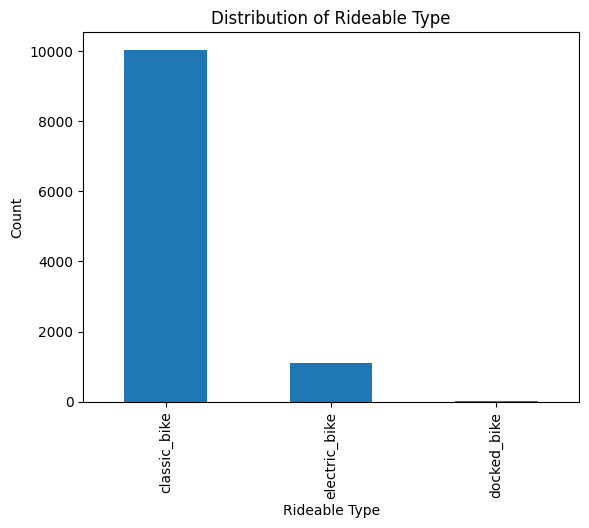

In [ ]:
import matplotlib.pyplot as plt

# Count of each rideable type
rideable_type_counts = df['rideable_type'].value_counts()
rideable_type_counts.plot(kind='bar')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Distribution of Rideable Type')
plt.show()

3. Explore User Type Distribution (Member vs. Casual)

Check the distribution of user types to understand the breakdown between members and casual users.

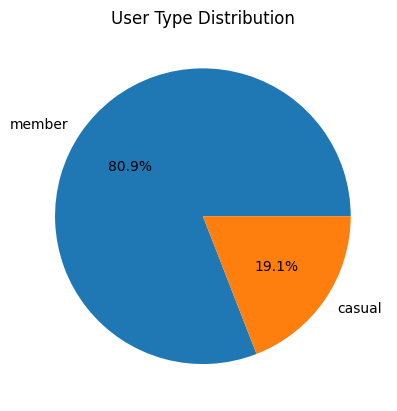

In [ ]:
user_type_counts = df['member_casual'].value_counts()
user_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('User Type Distribution')
plt.ylabel('')
plt.show()

4. Analyze Station Popularity

Identify the most popular start and end stations to understand which locations are the busiest.

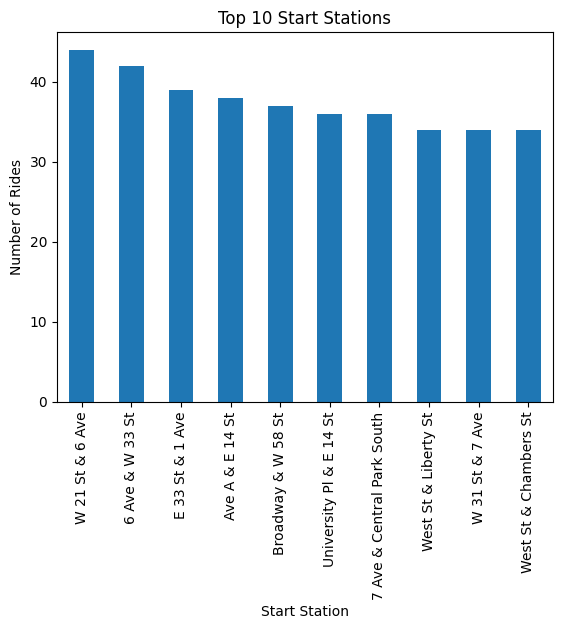

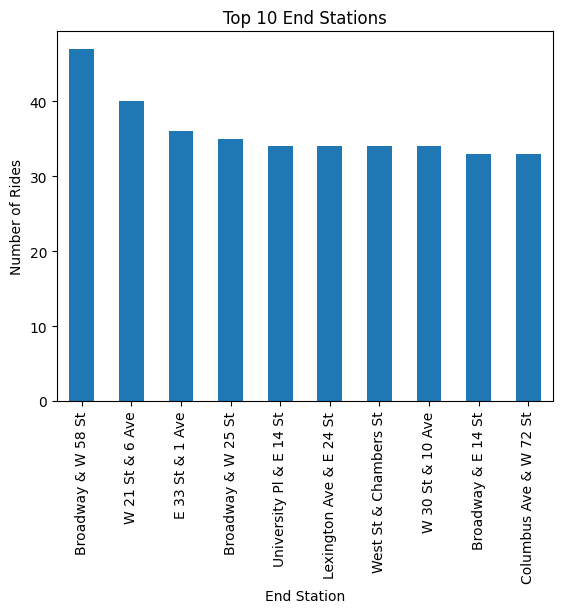

In [ ]:
# Top 10 most popular start stations
top_start_stations = df['start_station_name'].value_counts().head(10)
top_start_stations.plot(kind='bar')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 Start Stations')
plt.show()

# Top 10 most popular end stations
top_end_stations = df['end_station_name'].value_counts().head(10)
top_end_stations.plot(kind='bar')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 End Stations')
plt.show()

5.Analyze Temporal Patterns

Analyze usage patterns by day of the week and hour of the day.

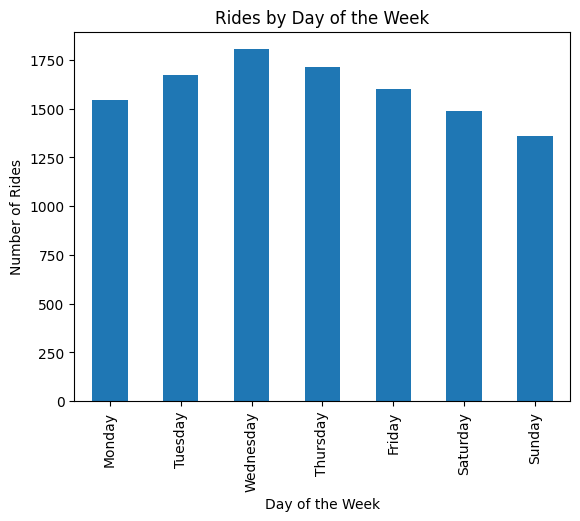

In [ ]:
# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extract day of the week and hour from 'started_at' for analysis
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour

# Rides by day of the week
day_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Rides by Day of the Week')
plt.show()

6.Visualize Trip Duration Distribution

Visualize the distribution of trip durations to see if there are common trip lengths.

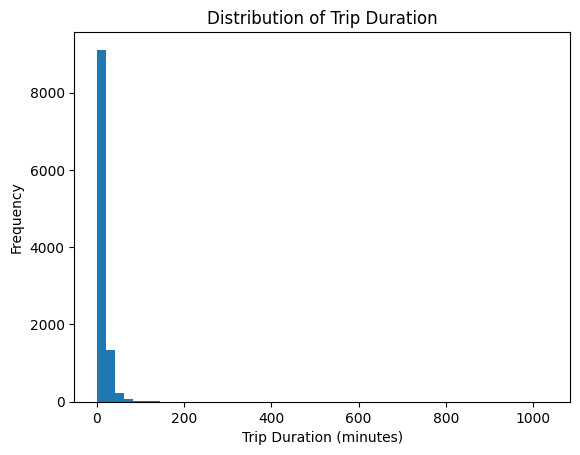

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out outliers (e.g., trips longer than 24 hours or less than 1 minute if needed)
df = df[(df['trip_duration'] > 1) & (df['trip_duration'] < 1440)]  # Keep durations between 1 minute and 24 hours

# Plot trip duration distribution
plt.hist(df['trip_duration'], bins=50)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

In [ ]:
df['trip_duration'].median()

9.283333333333333

**Data Cleaning**

In [ ]:
#examine size of dataframe:
df.shape

(1000000, 13)

In [ ]:
#determine type in each column
for i in df:
  print(str(i)+': '+str(type(df[i][0])))

ride_id: <class 'str'>
rideable_type: <class 'str'>
started_at: <class 'str'>
ended_at: <class 'str'>
start_station_name: <class 'str'>
start_station_id: <class 'str'>
end_station_name: <class 'str'>
end_station_id: <class 'str'>
start_lat: <class 'numpy.float64'>
start_lng: <class 'numpy.float64'>
end_lat: <class 'numpy.float64'>
end_lng: <class 'numpy.float64'>
member_casual: <class 'str'>


In [ ]:
## evaluate missing values
if df.isnull().any().any() == False:
  print('There are no missing values in the dataset')
else:
  print('There are missing values that need to be handled')
  for i in df:
    print("There are "+str(df[i].isna().sum()) +' missing values in the ' +str(i)+' column')

There are missing values that need to be handled
There are 0 missing values in the ride_id column
There are 0 missing values in the rideable_type column
There are 0 missing values in the started_at column
There are 0 missing values in the ended_at column
There are 541 missing values in the start_station_name column
There are 541 missing values in the start_station_id column
There are 2808 missing values in the end_station_name column
There are 2808 missing values in the end_station_id column
There are 0 missing values in the start_lat column
There are 0 missing values in the start_lng column
There are 713 missing values in the end_lat column
There are 713 missing values in the end_lng column
There are 0 missing values in the member_casual column


In [ ]:
start_mode = df['start_station_name'].mode()[0]
df['start_station_name'] = df['start_station_name'].fillna(start_mode)

end_mode = df['end_station_name'].mode()[0]
df['end_station_name']=df['end_station_name'].fillna(end_mode)

end_lat_mean = df['end_lat'].mean()
df['end_lat'] = df['end_lat'].fillna(end_lat_mean)

end_lng_mean = df['end_lng'].mean()
df['end_lng']=df['end_lng'].fillna(end_lng_mean)

df.drop('start_station_id',axis=1, inplace=True)
df.drop('end_station_id',axis=1,inplace=True)
df.drop('ride_id', axis=1, inplace=True)

if df.isnull().any().any() == False:
  print('There are no missing values in the dataset')
else:
  print('There are missing values that need to be handled')

There are no missing values in the dataset


**Convert Date and Time**

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].dt.day

df['start_hour'] = df['started_at'].dt.hour
df['start_minute'] = df['started_at'].dt.minute

df['end_hour'] = df['ended_at'].dt.hour
df['end_minute'] = df['ended_at'].dt.minute
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df.drop('started_at',axis=1,inplace=True)
df.drop('ended_at', axis=1, inplace=True)


if df.isnull().any().any() == False:
  print('There are no missing values in the dataset')
else:
  print('There are missing values that need to be handled')

There are no missing values in the dataset


In [ ]:
df.to_csv('citibike_2023_cleaned.csv', index=False)

**Split the Data**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#split the dataset into features and labels
features = df.drop(columns=['member_casual'])
label = df['member_casual']

#split the data into development (80%) and test datasets (20%)
x_dev, x_test, y_dev, y_test = train_test_split(features, label, test_size=0.2)

**Encode Categorical Features**

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import numpy as np

#define which columns will have which transformations
oh_features = ['rideable_type']
ord_features = ['start_station_name', 'end_station_name']

#define transformations
one_h = OneHotEncoder(handle_unknown='ignore')
ord_e = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocess = ColumnTransformer(transformers = [('onehot', one_h, oh_features),
                                               ('ordinal', ord_e, ord_features)], remainder = 'passthrough')
pipeline = Pipeline(steps=[('prep',preprocess)])

#apply encoding
x_dev_enc = pipeline.fit_transform(x_dev)
x_test_enc = pipeline.transform(x_test)

onehot_features = pipeline.named_steps['prep'].transformers_[0][1].get_feature_names_out(oh_features)
# Combine feature names
all_features = np.concatenate([onehot_features, x_dev.drop(columns=oh_features + ord_features).columns, ord_features])

# Create DataFrames
x_dev_encoded = pd.DataFrame(x_dev_enc, columns=all_features, index=x_dev.index)
x_test_encoded = pd.DataFrame(x_test_enc, columns=all_features, index=x_test.index)

In [ ]:
x_dev_encoded.corr()

,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,end_lat,end_lng,month,day,start_hour,start_minute,end_hour,end_minute,trip_duration,start_station_name,end_station_name
rideable_type_classic_bike,1.000000,-0.130477,-0.989413,0.002309,0.002108,-0.014025,-0.010741,-0.013833,-0.010550,0.180010,0.009577,-0.003969,0.001717,-0.003404,0.001416,-0.009471
rideable_type_docked_bike,-0.130477,1.000000,-0.014787,-0.000627,0.000332,-0.003885,-0.016214,-0.003998,-0.015095,-0.033638,-0.006394,0.002623,0.000413,0.002559,0.001840,0.095613
rideable_type_electric_bike,-0.989413,-0.014787,1.000000,-0.002237,-0.002175,0.014713,0.013205,0.014536,0.012849,-0.176619,-0.008722,0.003619,-0.001792,0.003058,-0.001698,-0.004444
start_lat,0.002309,-0.000627,-0.002237,1.000000,0.177963,-0.001144,-0.148600,-0.005377,-0.112402,0.004328,0.001686,0.008708,-0.000883,0.008010,0.000033,0.001744
start_lng,0.002108,0.000332,-0.002175,0.177963,1.000000,-0.004142,-0.108839,-0.004850,-0.147905,0.004906,0.000652,0.001770,0.000682,0.001643,-0.001259,0.029144
end_lat,-0.014025,-0.003885,0.014713,-0.001144,-0.004142,1.000000,0.350887,0.892918,0.313743,-0.009989,-0.000381,-0.004101,-0.002475,-0.002725,0.001345,0.004531
end_lng,-0.010741,-0.016214,0.013205,-0.148600,-0.108839,0.350887,1.000000,0.313943,0.809965,0.025402,0.004677,-0.014155,-0.003609,-0.015318,-0.001886,-0.001170
month,-0.013833,-0.003998,0.014536,-0.005377,-0.004850,0.892918,0.313943,1.000000,0.356127,-0.011352,0.000358,-0.007058,-0.002537,-0.005950,0.002058,0.004740
day,-0.010550,-0.015095,0.012849,-0.112402,-0.147905,0.313743,0.809965,0.356127,1.000000,0.024784,0.005150,0.028019,-0.005259,0.022314,-0.004129,0.002600
start_hour,0.180010,-0.033638,-0.176619,0.004328,0.004906,-0.009989,0.025402,-0.011352,0.024784,1.000000,-0.036307,-0.004676,0.003063,-0.005875,-0.002026,0.000392
